In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, accuracy_score
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from random import shuffle
from sklearn import tree
import matplotlib

In [2]:
iris = datasets.load_iris()
ind_list = [i for i in range(len(iris.data))]
shuffle(ind_list)

iris.data.shape


(150, 4)

In [3]:
X = iris.data[ind_list[ : 120], : 2]
Y = iris.target[ind_list[ : 120]]
test_X = iris.data[ind_list[120 : ] , : 2]
test_Y = iris.target[ind_list[120 : ]]

In [4]:
print(X.shape)
print(Y.shape)
print(test_X.shape)
print(test_Y.shape)

(120, 2)
(120,)
(30, 2)
(30,)


In [5]:
model = DecisionTreeClassifier()
model = model.fit(X,Y)

In [6]:
pred = model.predict(test_X)
print("정확도:", accuracy_score(test_Y, pred)) #예측값과 실제값 비교

정확도: 0.7


---
# 그래프
----

In [7]:
feature_name = ['petal_length','petal_width']
target_name = [i for i in iris.target_names]
target_name

['setosa', 'versicolor', 'virginica']

In [8]:
dt_dot_data = tree.export_graphviz(model, out_file = None,
                                  feature_names = feature_name,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [9]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

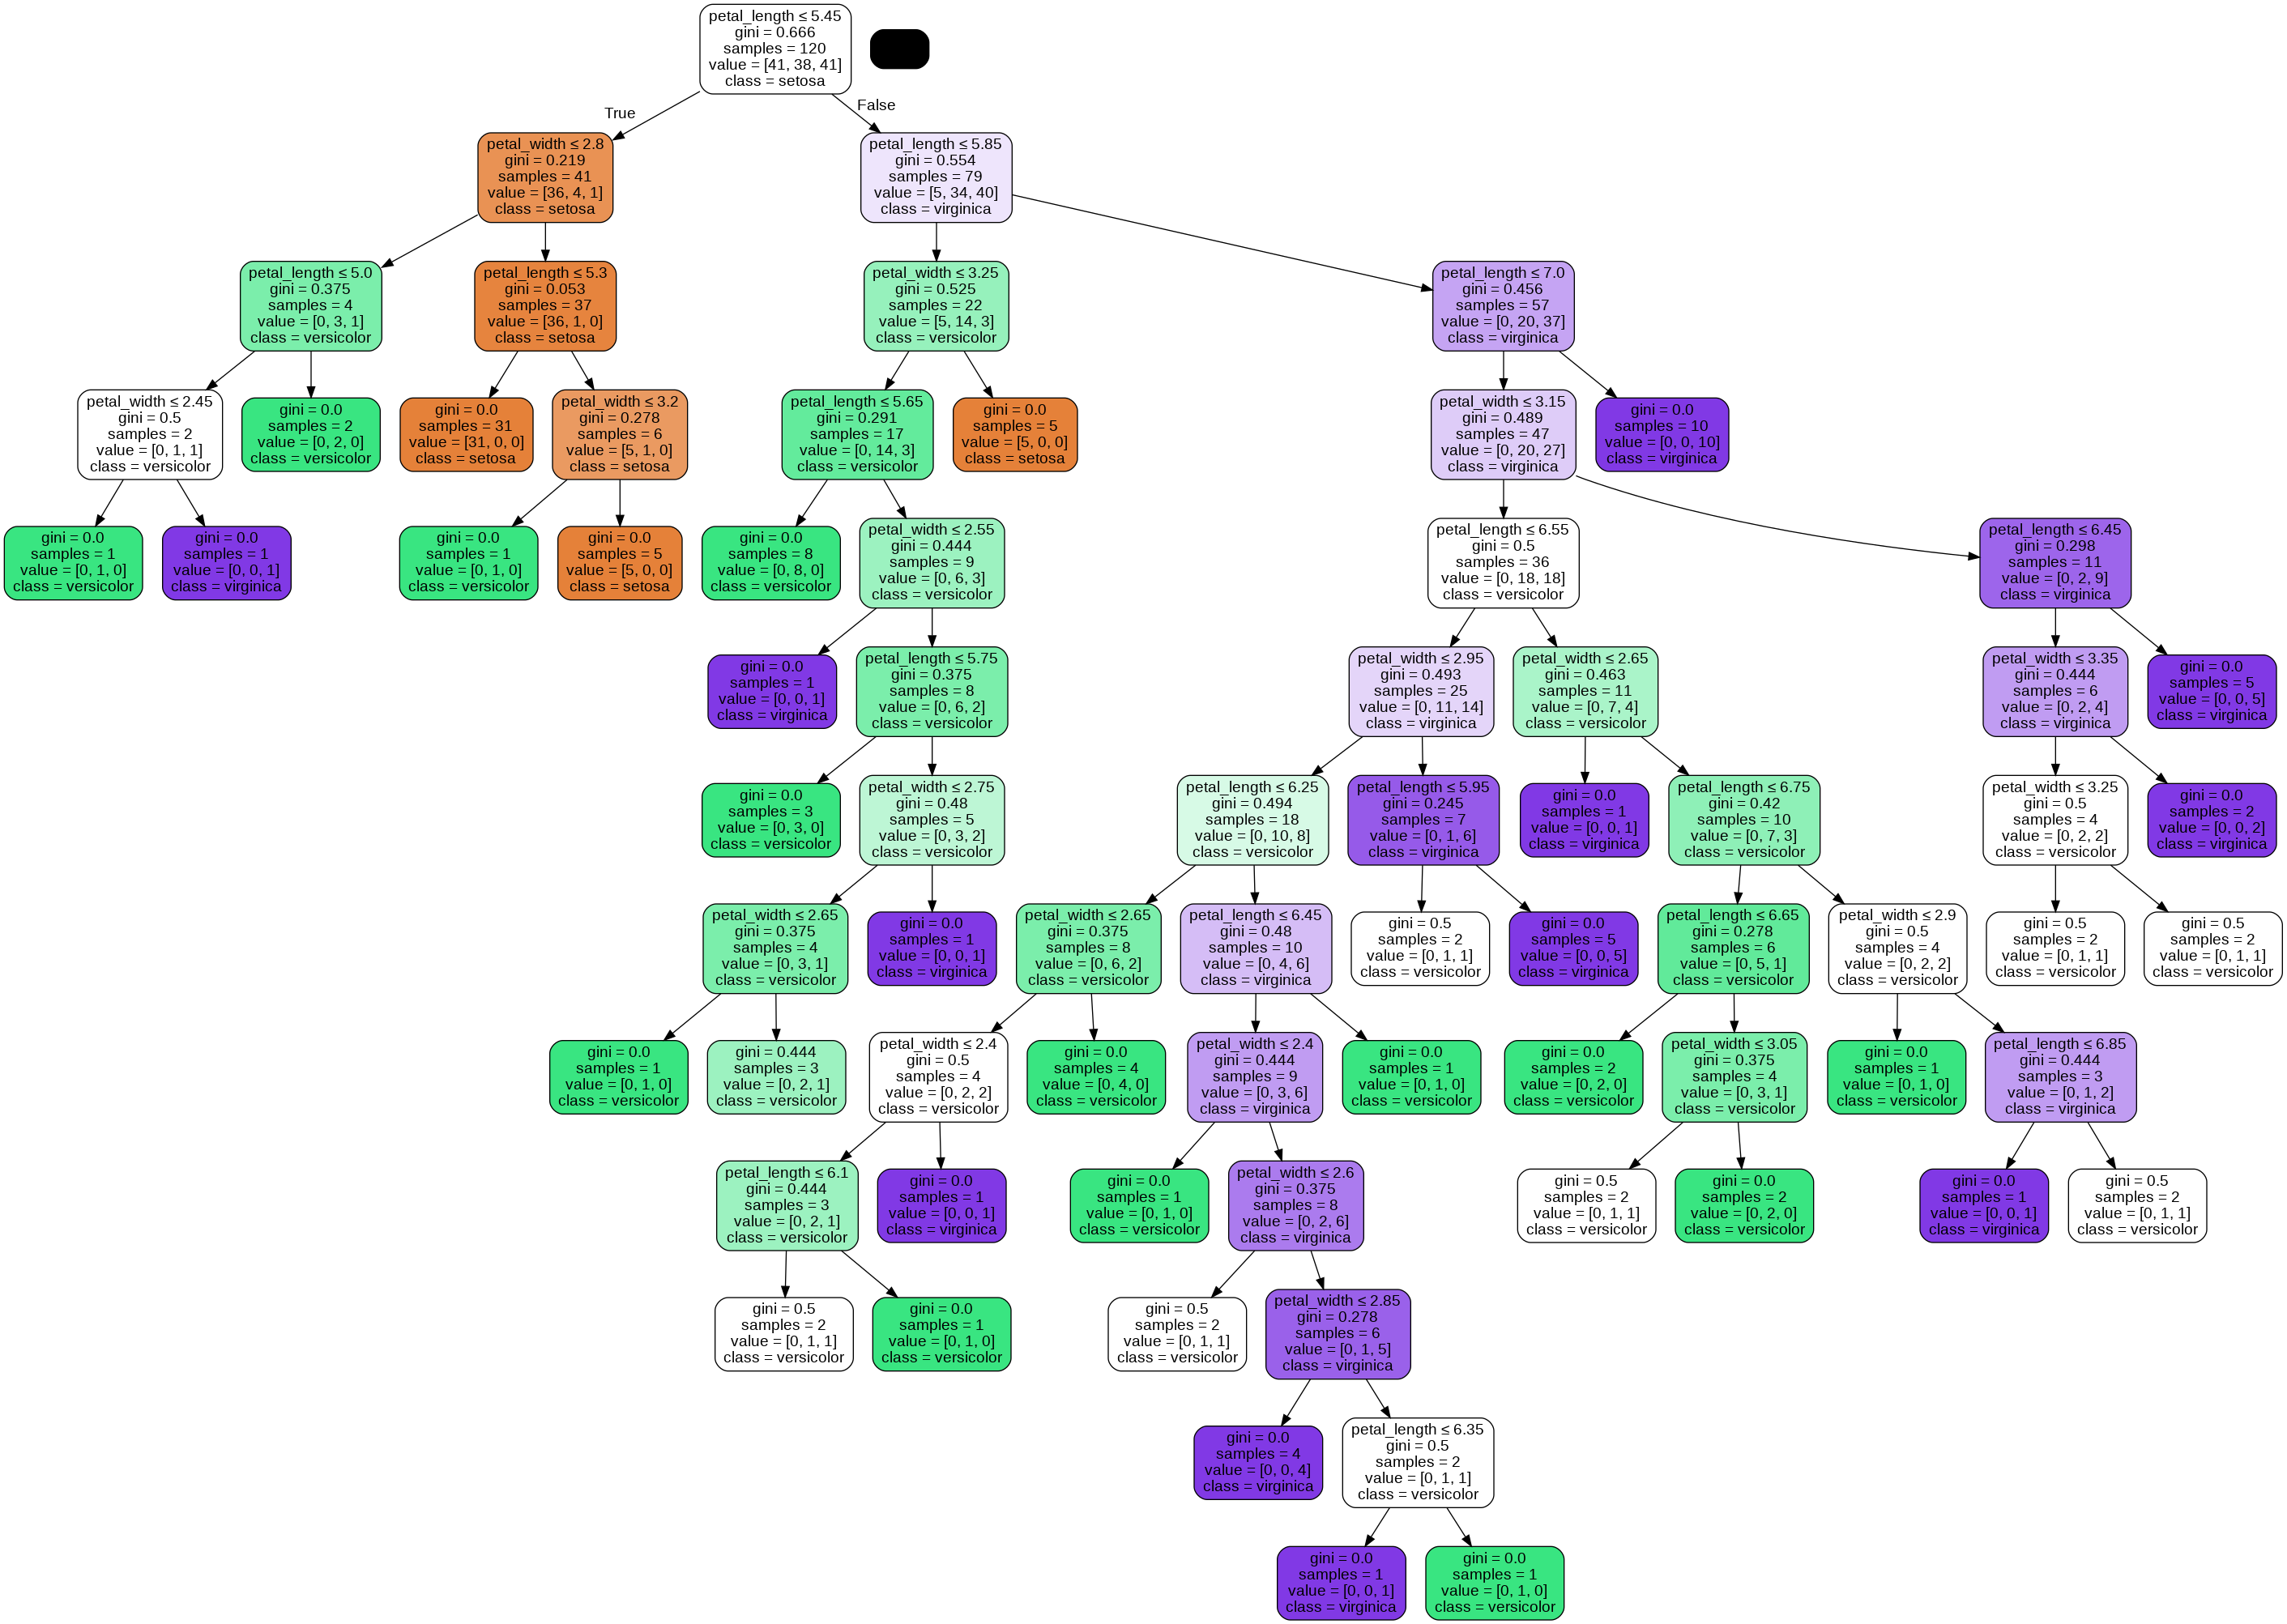

In [10]:
Image(dt_graph.create_png())

Text(0.5, 1.0, 'Decision Tree')

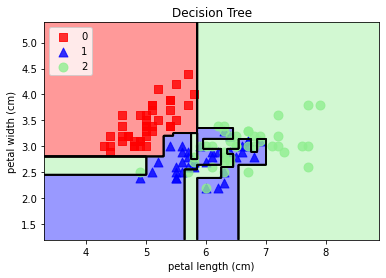

In [11]:
resolution = 0.01
markers = ('s', '^', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = matplotlib.colors.ListedColormap(colors)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
Z = model.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

plt.contour(xx1, xx2, Z, cmap=matplotlib.colors.ListedColormap(['k']))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(Y)):
    plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1], alpha=0.8,
                c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend(loc='upper left')
plt.title('Decision Tree')

---
# Entropy
---

In [12]:
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(X,Y)

In [13]:
pred = model.predict(test_X)
print("정확도:", accuracy_score(test_Y, pred)) #예측값과 실제값 비교

정확도: 0.7


In [14]:
dt_dot_data = tree.export_graphviz(model, out_file = None,
                                  feature_names = feature_name,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [15]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

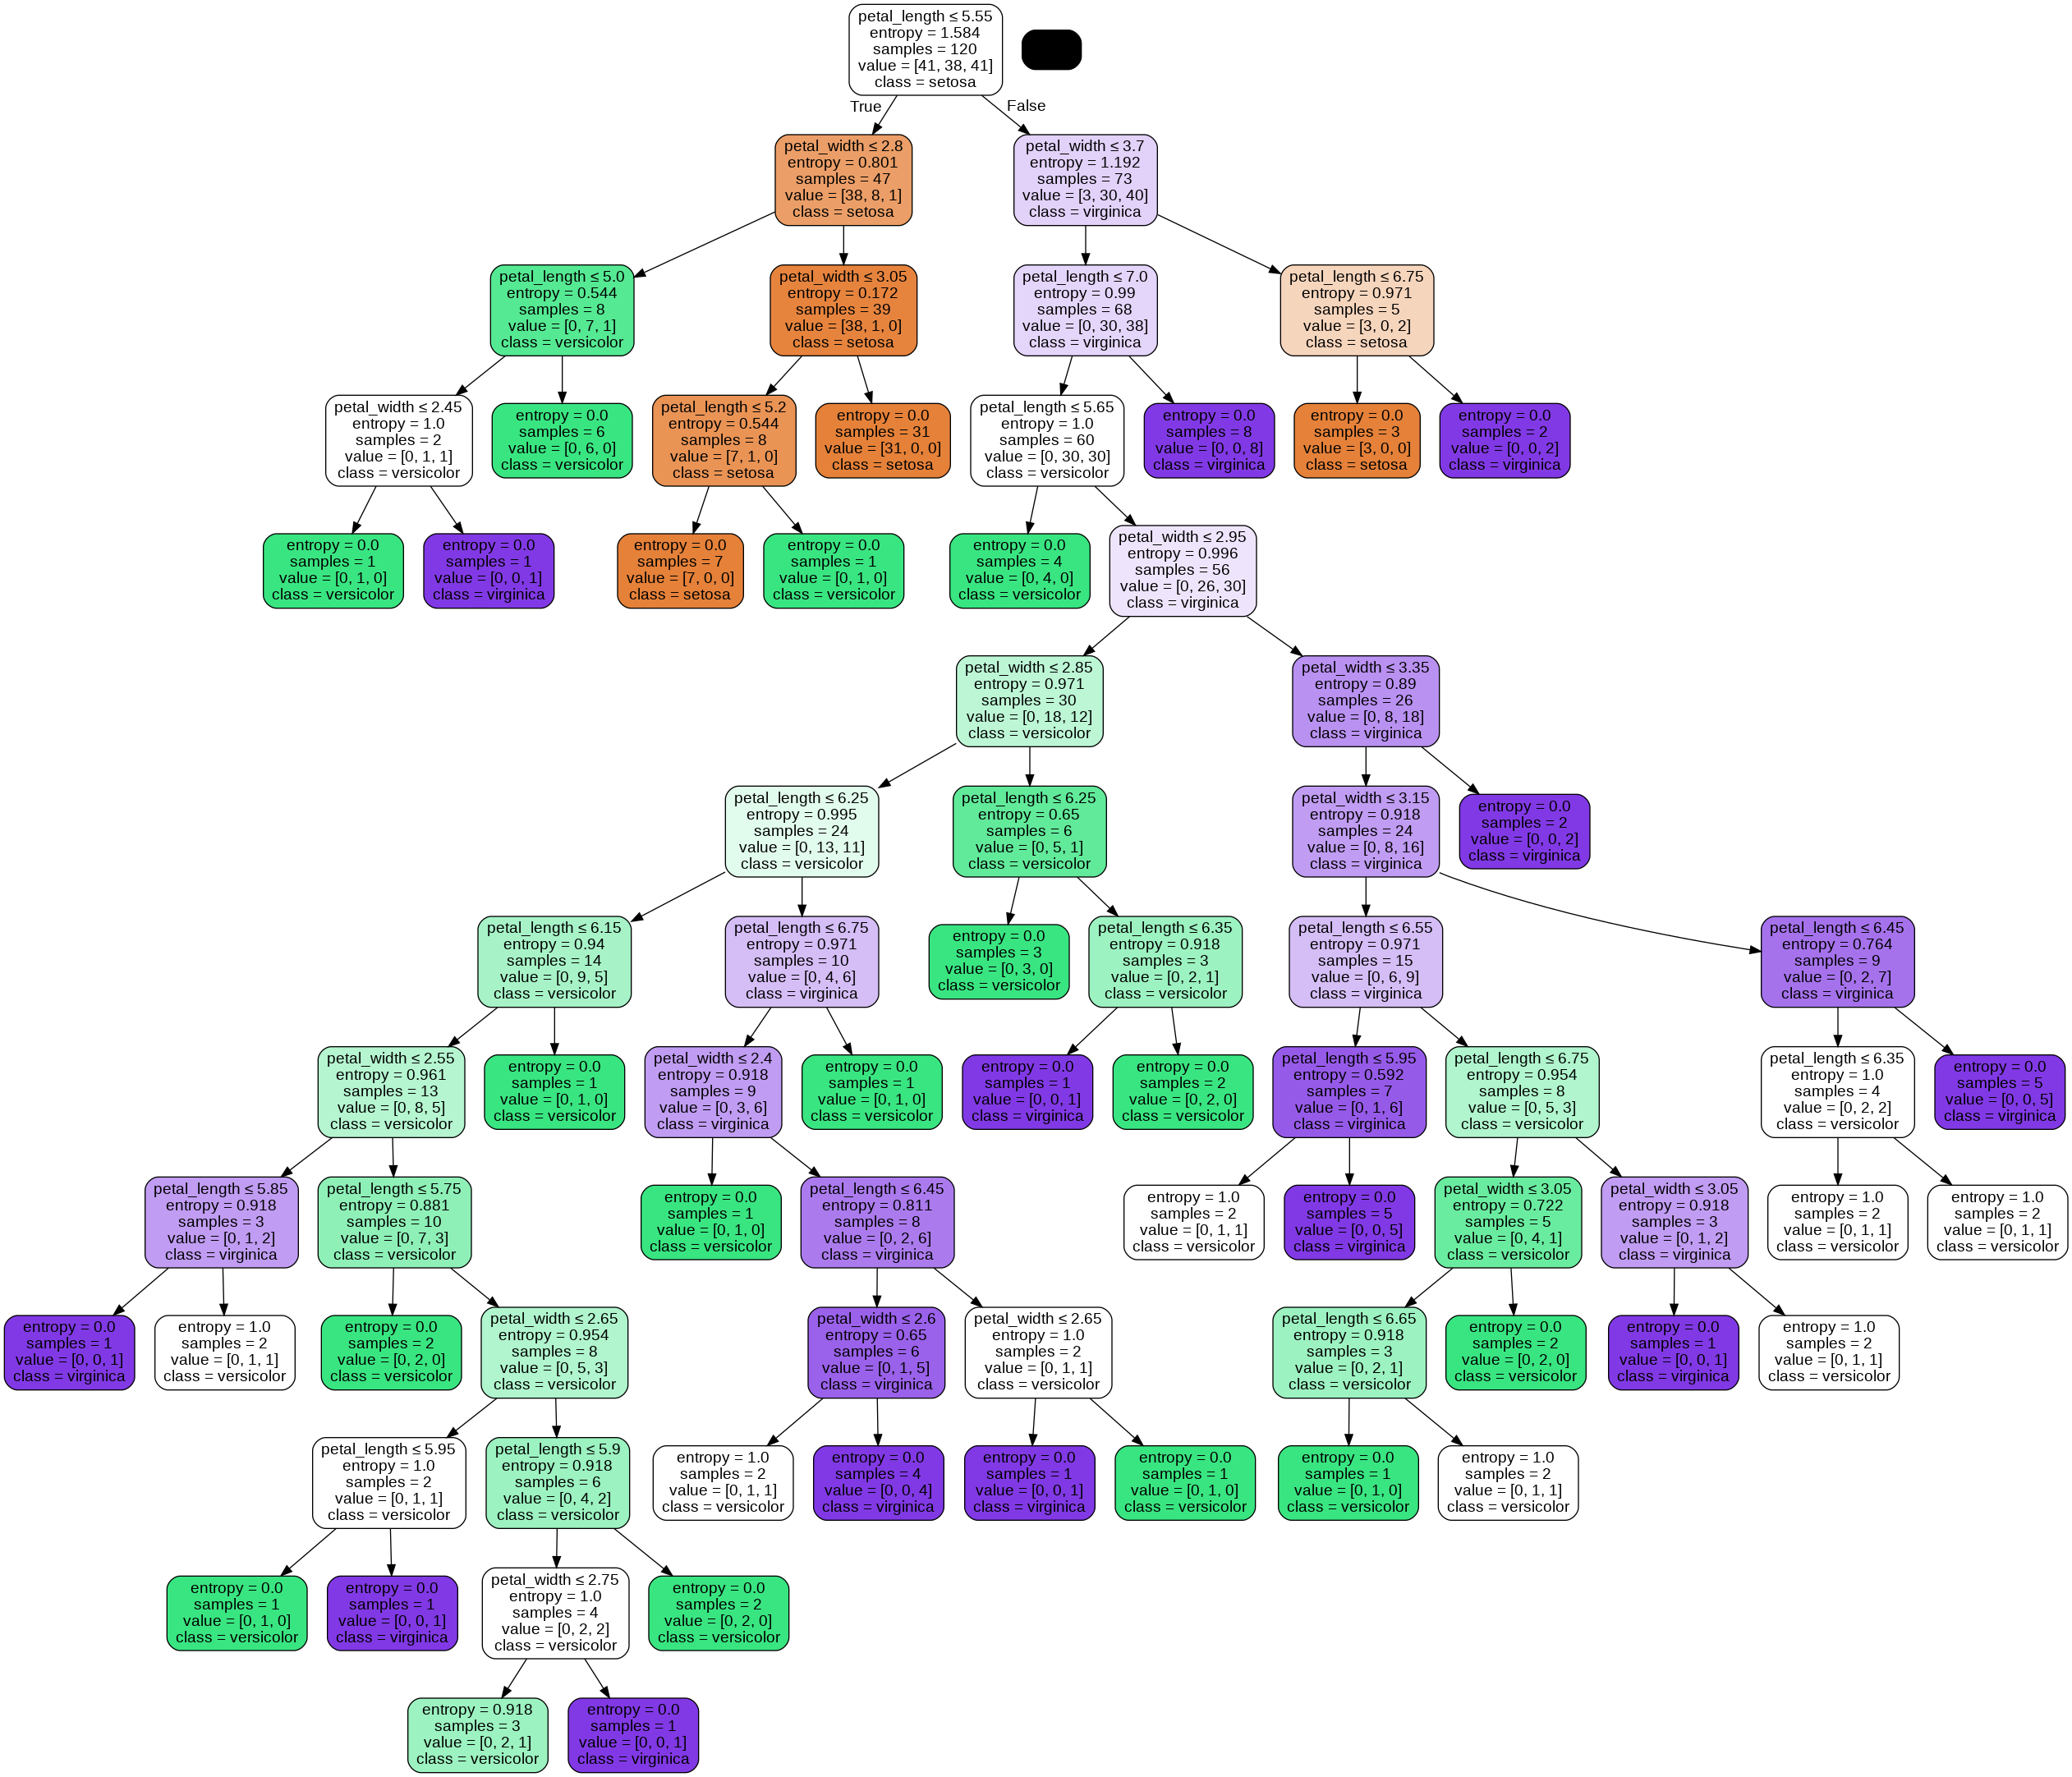

In [16]:
Image(dt_graph.create_png())

Text(0.5, 1.0, 'Decision Tree')

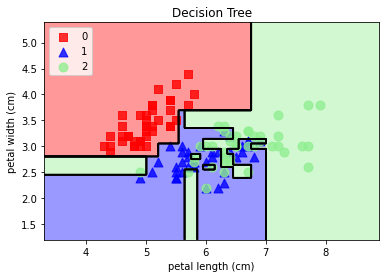

In [17]:
resolution = 0.01
markers = ('s', '^', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = matplotlib.colors.ListedColormap(colors)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
Z = model.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

plt.contour(xx1, xx2, Z, cmap=matplotlib.colors.ListedColormap(['k']))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(Y)):
    plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1], alpha=0.8,
                c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend(loc='upper left')
plt.title('Decision Tree')